In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [12]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [13]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [14]:
# Declare a SQLAlchemy using `automap_base()`to reflect my SQL tables to Python classes
Base = automap_base()

# Using Base class to reflect the database tables
Base.prepare(engine, reflect=True)

# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [18]:
inspector = inspect(engine)

In [30]:
# Find the most recent date in the data set
# Using inspector to print column names within the 'measurement' table and its types
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [28]:
# Using inspector to print column names within the 'station' table and its types
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [23]:
m_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
m_recent_date

('2017-08-23',)

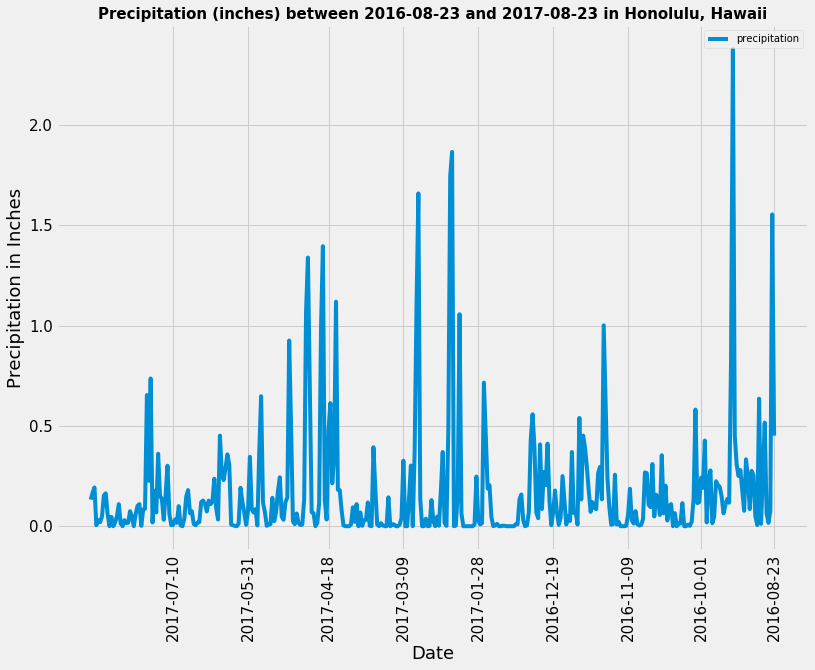

In [119]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results, 
# starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(measurement.date, func.avg(measurement.prcp))\
.filter(measurement.date > '2016-08-22')\
.group_by(measurement.date)\
.order_by(measurement.date.desc())\
.all()

#save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Drop NA values

prcp_df = pd.DataFrame(prcp_data)
prcp_df.columns = ['Date', 'Precipiation']
prcp_df.dropna(axis=0, how='any', inplace= True)
prcp_df
prcp_dated_df = prcp_df.set_index('Date')
prcp_dated_df
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(12, 9))
plt.plot(prcp_dated_df.index, prcp_dated_df['Precipiation'])

#  
plt.legend(['precipitation'], loc="upper right",fontsize=10)
# set x location
xloc = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18','2017-05-31','2017-07-10'] 

# Assign xticks
plt.xticks(xloc, rotation='vertical',fontsize=15)
# Set Labels & Title
plt.xlabel('Date', fontsize=18)
plt.ylabel("Precipitation in Inches",fontsize=18)
plt.title(f"Precipitation (inches) between 2016-08-23 and 2017-08-23 in Honolulu, Hawaii", fontsize=15, fontweight = 'bold')
plt.yticks(size=15)




# Show plot
plt.show()


In [120]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_dated_df.describe()

,Precipiation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [84]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.station)).all()[0][0]

9

In [121]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
top_station = session.query(func.count(measurement.station), measurement.station).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
top_station                                                                                               

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [123]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station==top_station[0][1]).all()

[(54.0, 85.0, 71.66378066378067)]

In [124]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_histogram = session.query(measurement.tobs).filter(measurement.station==top_station[0][1]).filter(measurement.date > '2016-08-22').all()
tobs_histogram

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


In [125]:
tobs_df = pd.DataFrame(tobs_histogram, columns= ['Temp'])
tobs_df.head()

,Temp
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


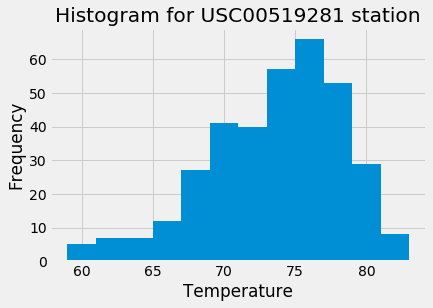

In [104]:
tobs_df.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram for USC00519281 station')
plt.show()

# Close session

In [ ]:
# Close Session
session.close()